In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
def mg_per_m3_to_ppm(concentration_mg_per_m3):
    # Conversion factor: 1 mg/m³ = 0.001 ppm
    ppm_conversion_factor = 0.001

    # Convert concentration to ppm
    concentration_ppm = concentration_mg_per_m3 * ppm_conversion_factor * 10**6

    return concentration_ppm

# Example usage
concentration_mg_per_m3 = 2
concentration_ppm = mg_per_m3_to_ppm(concentration_mg_per_m3)
print(f"{concentration_mg_per_m3} mg/m³ is equal to {concentration_ppm} ppm")


2 mg/m³ is equal to 2000.0 ppm


In [ ]:
aq=pd.read_excel('AirQualityUCI.xlsx')

In [ ]:
#aq1 = pd.read_csv("/Users/tejk/Desktop/Stat Comp/project/Air_Quality_UCI.csv")

In [ ]:
aq.head(10)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
5 2004-03-10  23:00:00     1.2      1197.00        38   4.741012   
6 2004-03-11  00:00:00     1.2      1185.00        31   3.624399   
7 2004-03-11  01:00:00     1.0      1136.25        31   3.326677   
8 2004-03-11  02:00:00     0.9      1094.00        24   2.339416   
9 2004-03-11  03:00:00     0.6      1009.75        19   1.696658   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   
5         750.25     89.0       1336.50     96.0       1393.00       949.25   
6         689.50     62.0       1461.75     77.0       1332.75       732.50   
7         672.00     62.0       1453.25     76.0       1332.75       729.50   
8         608.50     45.0       1579.00     60.0       1276.00       619.50   
9         560.75   -200.0       1705.00   -200.0       1234.75       501.25   

        T         RH        AH  
0  13.600  48.875001  0.757754  
1  13.300  47.700000  0.725487  
2  11.900  53.975000  0.750239  
3  11.000  60.000000  0.786713  
4  11.150  59.575001  0.788794  
5  11.175  59.175000  0.784772  
6  11.325  56.775000  0.760312  
7  10.675  60.000000  0.770238  
8  10.650  59.674999  0.764819  
9  10.250  60.200001  0.751657

In [ ]:
aq.shape

(9357, 15)

In [ ]:
aq.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
ar=aq.copy()
for column in ar.columns[2:]:
    negative_values = ar[ar[column] < 0]

    if not negative_values.empty:
        print(f"Column '{column}' has negative values:")

        # Create a dictionary to store counts of negative values
        negative_counts = {}

        for index, value in negative_values.iterrows():
            value = value[column]
            if value in negative_counts:
                negative_counts[value] += 1
            else:
                negative_counts[value] = 1

        for value, count in negative_counts.items():

            print(f"Negative value {value} occurred {count} times")

# drop -200 rows

Column 'CO(GT)' has negative values:
Negative value -200.0 occurred 1683 times
Column 'PT08.S1(CO)' has negative values:
Negative value -200.0 occurred 366 times
Column 'NMHC(GT)' has negative values:
Negative value -200 occurred 8443 times
Column 'C6H6(GT)' has negative values:
Negative value -200.0 occurred 366 times
Column 'PT08.S2(NMHC)' has negative values:
Negative value -200.0 occurred 366 times
Column 'NOx(GT)' has negative values:
Negative value -200.0 occurred 1639 times
Column 'PT08.S3(NOx)' has negative values:
Negative value -200.0 occurred 366 times
Column 'NO2(GT)' has negative values:
Negative value -200.0 occurred 1642 times
Column 'PT08.S4(NO2)' has negative values:
Negative value -200.0 occurred 366 times
Column 'PT08.S5(O3)' has negative values:
Negative value -200.0 occurred 366 times
Column 'T' has negative values:
Negative value -200.0 occurred 366 times
Negative value -0.050000000745058 occurred 1 times
Negative value -0.25000000558794 occurred 1 times
Negative 

In [ ]:
ar = aq.copy()

# Iterate over columns
for column in ar.columns[2:]:
    negative_indices = ar.index[ar[column] == -200]  # Find indices where value is -200

    if len(negative_indices) > 0:
        print(f"Column '{column}' has {len(negative_indices)} rows with value -200.")

        # Drop rows with value of -200
        ar = ar.drop(negative_indices)

# Optionally display the modified DataFrame
print("DataFrame after dropping rows with value -200:")
ar

Column 'CO(GT)' has 1683 rows with value -200.
Column 'PT08.S1(CO)' has 330 rows with value -200.
Column 'NMHC(GT)' has 6481 rows with value -200.
Column 'NOx(GT)' has 36 rows with value -200.
DataFrame after dropping rows with value -200:


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
1226 2004-04-30  20:00:00     4.4      1449.25       501  19.494597   
1227 2004-04-30  21:00:00     3.1      1362.50       234  15.100351   
1228 2004-04-30  22:00:00     3.0      1371.25       212  14.594739   
1229 2004-04-30  23:00:00     3.1      1406.25       275  13.697100   
1230 2004-05-01  00:00:00     3.5      1424.50       275  15.187992   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
1226        1282.25    254.0        625.00    133.0       2099.50   
1227        1151.75    189.0        683.75    110.0       1951.25   
1228        1135.75    174.0        689.00    102.0       1926.75   
1229        1106.75    167.0        718.25    108.0       1871.50   
1230        1154.50    185.0        709.25    110.0       1935.75   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
1226      1568.50  19.075  61.075001  1.334500  
1227      1494.75  18.200  65.350002  1.352888  
1228      1471.25  18.075  66.100000  1.357869  
1229      1383.75  17.700  66.875000  1.342218  
1230      1788.75  17.775  66.750002  1.345960  

[827 rows x 15 columns]

In [ ]:
ar.index[ar['CO(GT)'] == -200]

Index([], dtype='int64')

In [ ]:
for column in ar.columns[2:]:
    negative_values = ar[ar[column] < 0]

    if not negative_values.empty:
        print(f"Column '{column}' has negative values:")

        # Create a dictionary to store counts of negative values
        negative_counts = {}

        for index, value in negative_values.iterrows():
            value = value[column]
            if value in negative_counts:
                negative_counts[value] += 1
            else:
                negative_counts[value] = 1

        for value, count in negative_counts.items():

            print(f"Negative value {value} occurred {count} times")

# drop -200 rows

In [ ]:
df=ar.copy()
df=df.reset_index()
df.columns

Index(['index', 'Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
df = df.drop('index', axis=1)
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0   2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1   2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2   2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3   2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4   2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
..         ...       ...     ...          ...       ...        ...   
822 2004-04-30  20:00:00     4.4      1449.25       501  19.494597   
823 2004-04-30  21:00:00     3.1      1362.50       234  15.100351   
824 2004-04-30  22:00:00     3.0      1371.25       212  14.594739   
825 2004-04-30  23:00:00     3.1      1406.25       275  13.697100   
826 2004-05-01  00:00:00     3.5      1424.50       275  15.187992   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0          1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1           954.75    103.0       1173.75     92.0       1558.75       972.25   
2           939.25    131.0       1140.00    114.0       1554.50      1074.00   
3           948.25    172.0       1092.00    122.0       1583.75      1203.25   
4           835.50    131.0       1205.00    116.0       1490.00      1110.00   
..             ...      ...           ...      ...           ...          ...   
822        1282.25    254.0        625.00    133.0       2099.50      1568.50   
823        1151.75    189.0        683.75    110.0       1951.25      1494.75   
824        1135.75    174.0        689.00    102.0       1926.75      1471.25   
825        1106.75    167.0        718.25    108.0       1871.50      1383.75   
826        1154.50    185.0        709.25    110.0       1935.75      1788.75   

          T         RH        AH  
0    13.600  48.875001  0.757754  
1    13.300  47.700000  0.725487  
2    11.900  53.975000  0.750239  
3    11.000  60.000000  0.786713  
4    11.150  59.575001  0.788794  
..      ...        ...       ...  
822  19.075  61.075001  1.334500  
823  18.200  65.350002  1.352888  
824  18.075  66.100000  1.357869  
825  17.700  66.875000  1.342218  
826  17.775  66.750002  1.345960  

[827 rows x 15 columns]

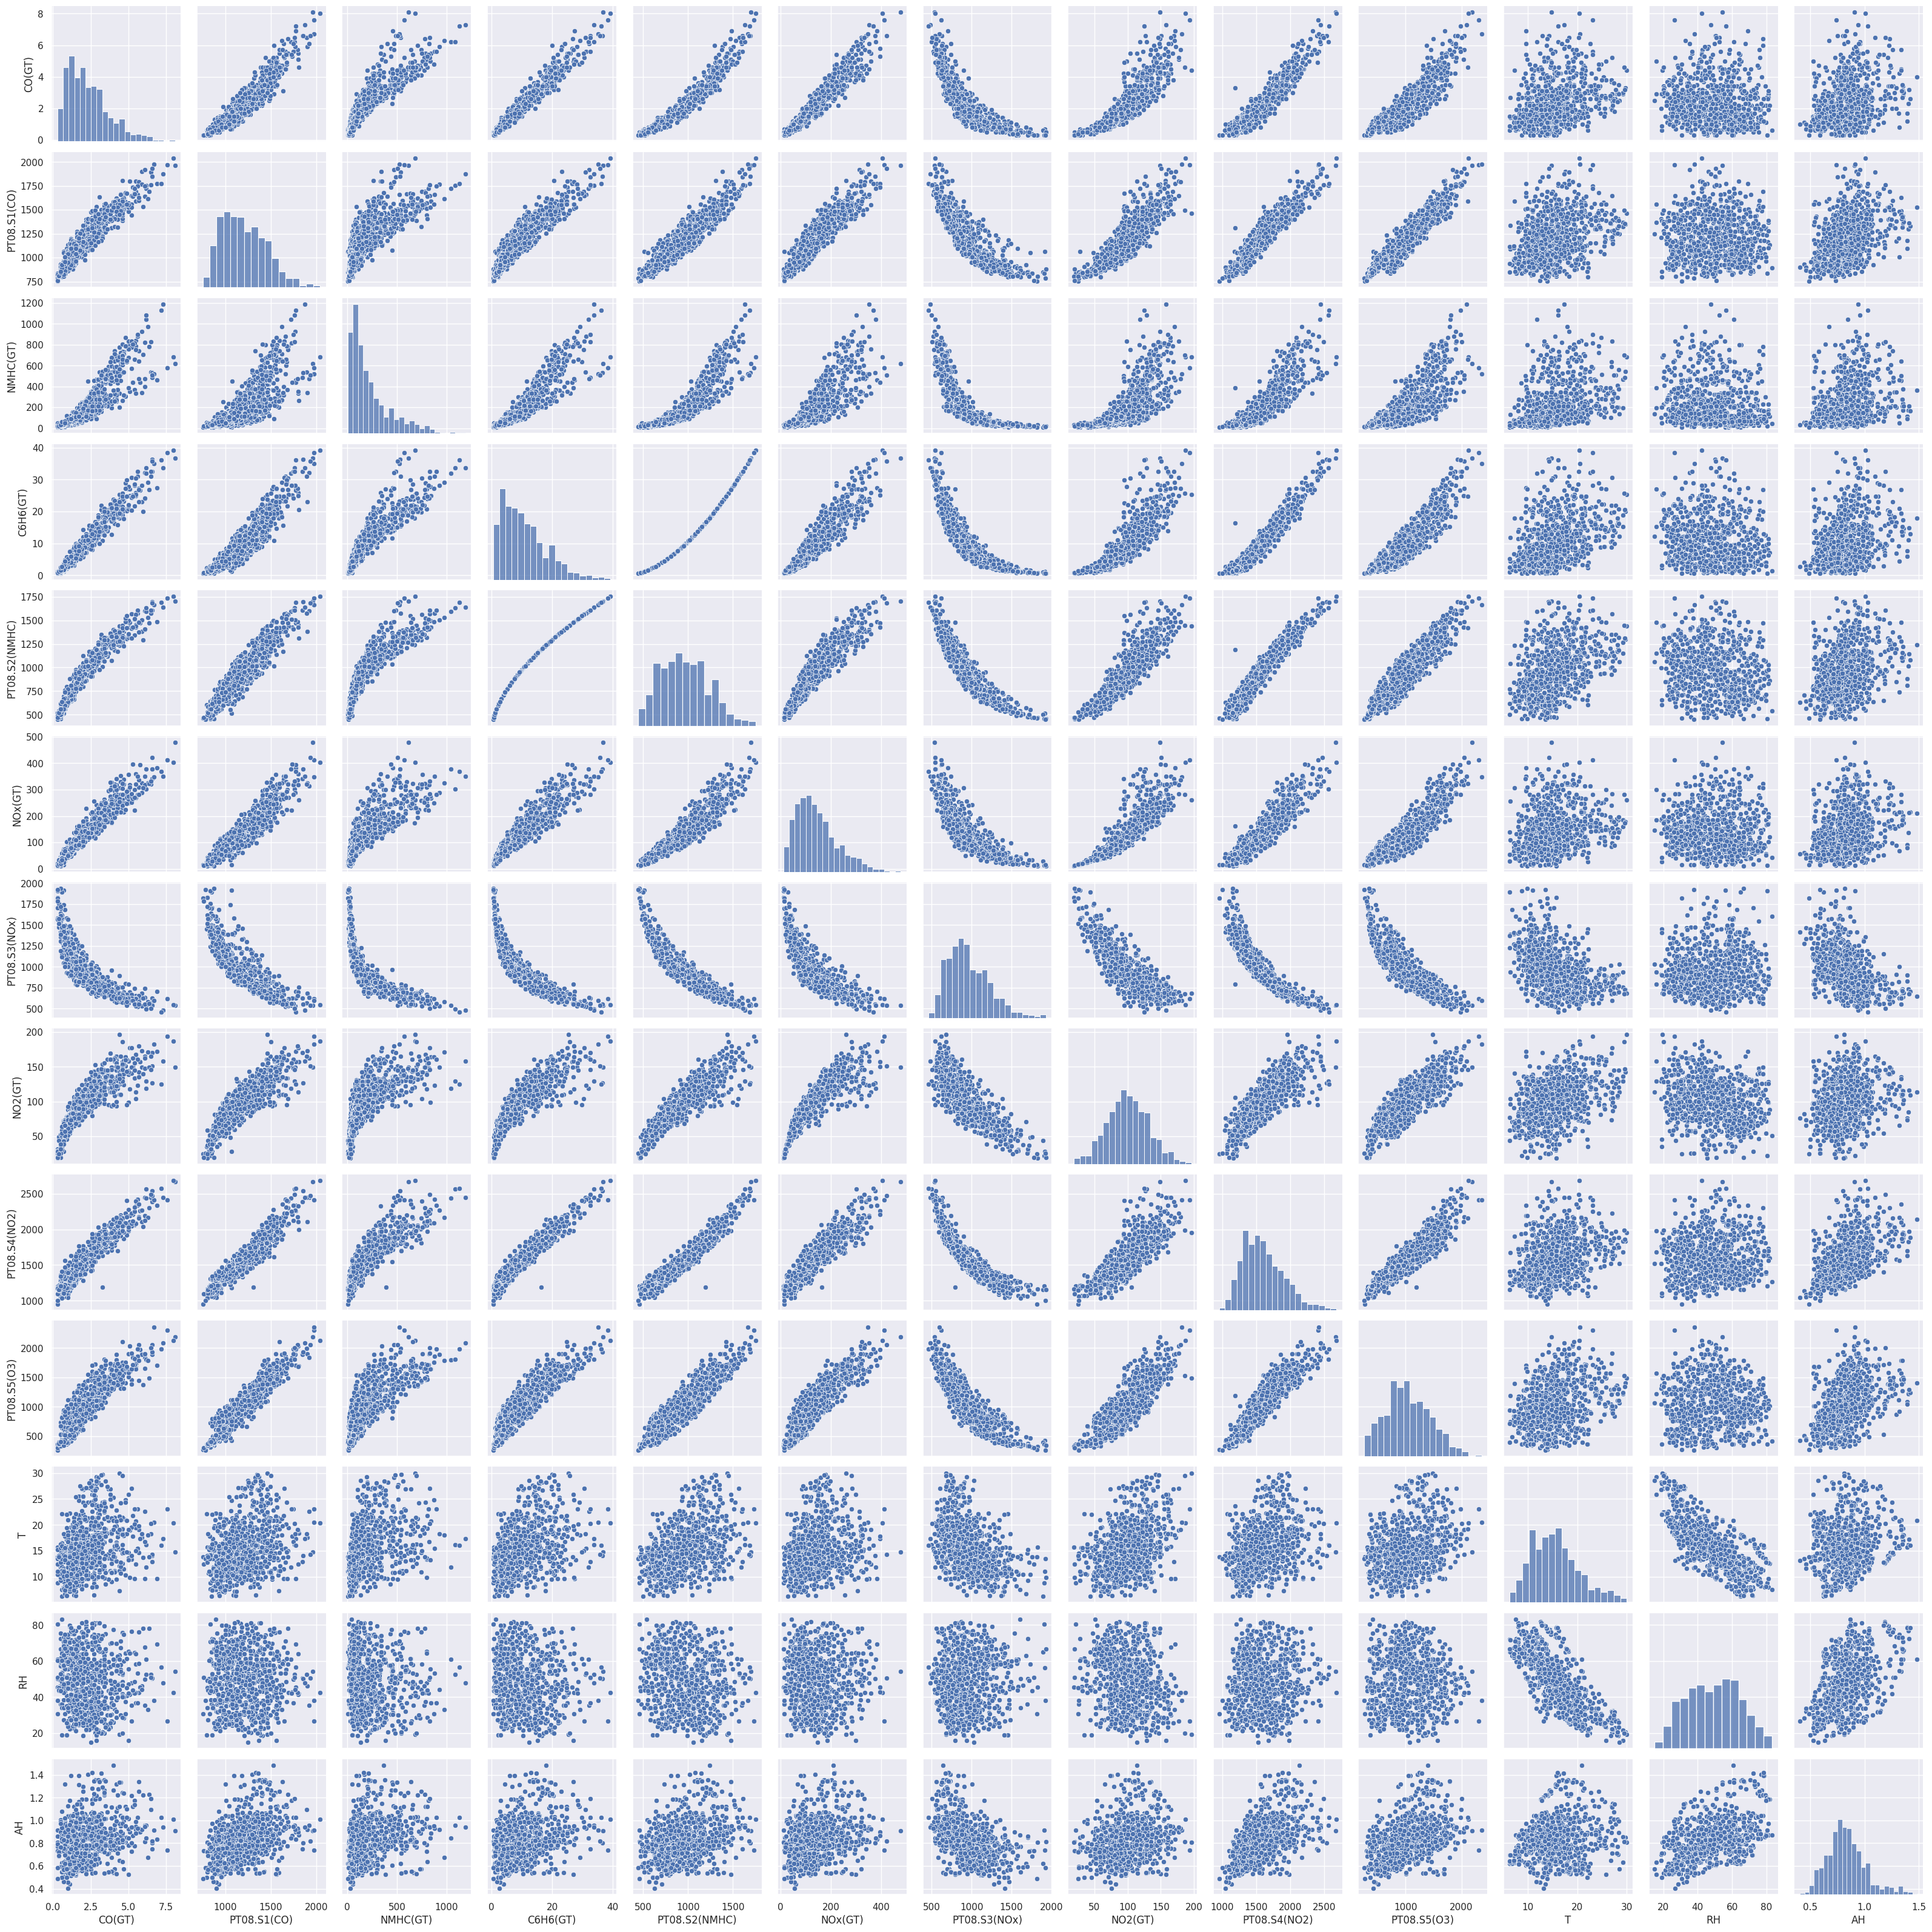

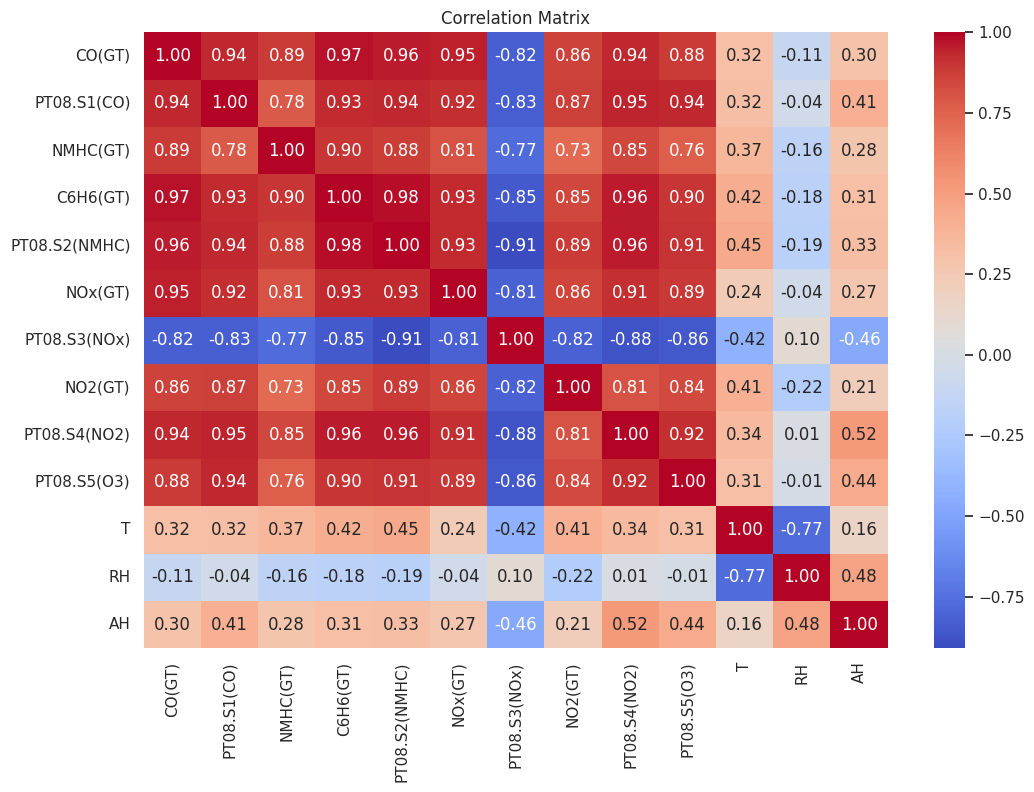

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop irrelevant columns (like "Date", "Time", and any unnamed columns)
data = df.drop(columns=["Date", "Time"])

# Visualize pair-wise relationships with scatter plots
sns.pairplot(data)
plt.show()

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

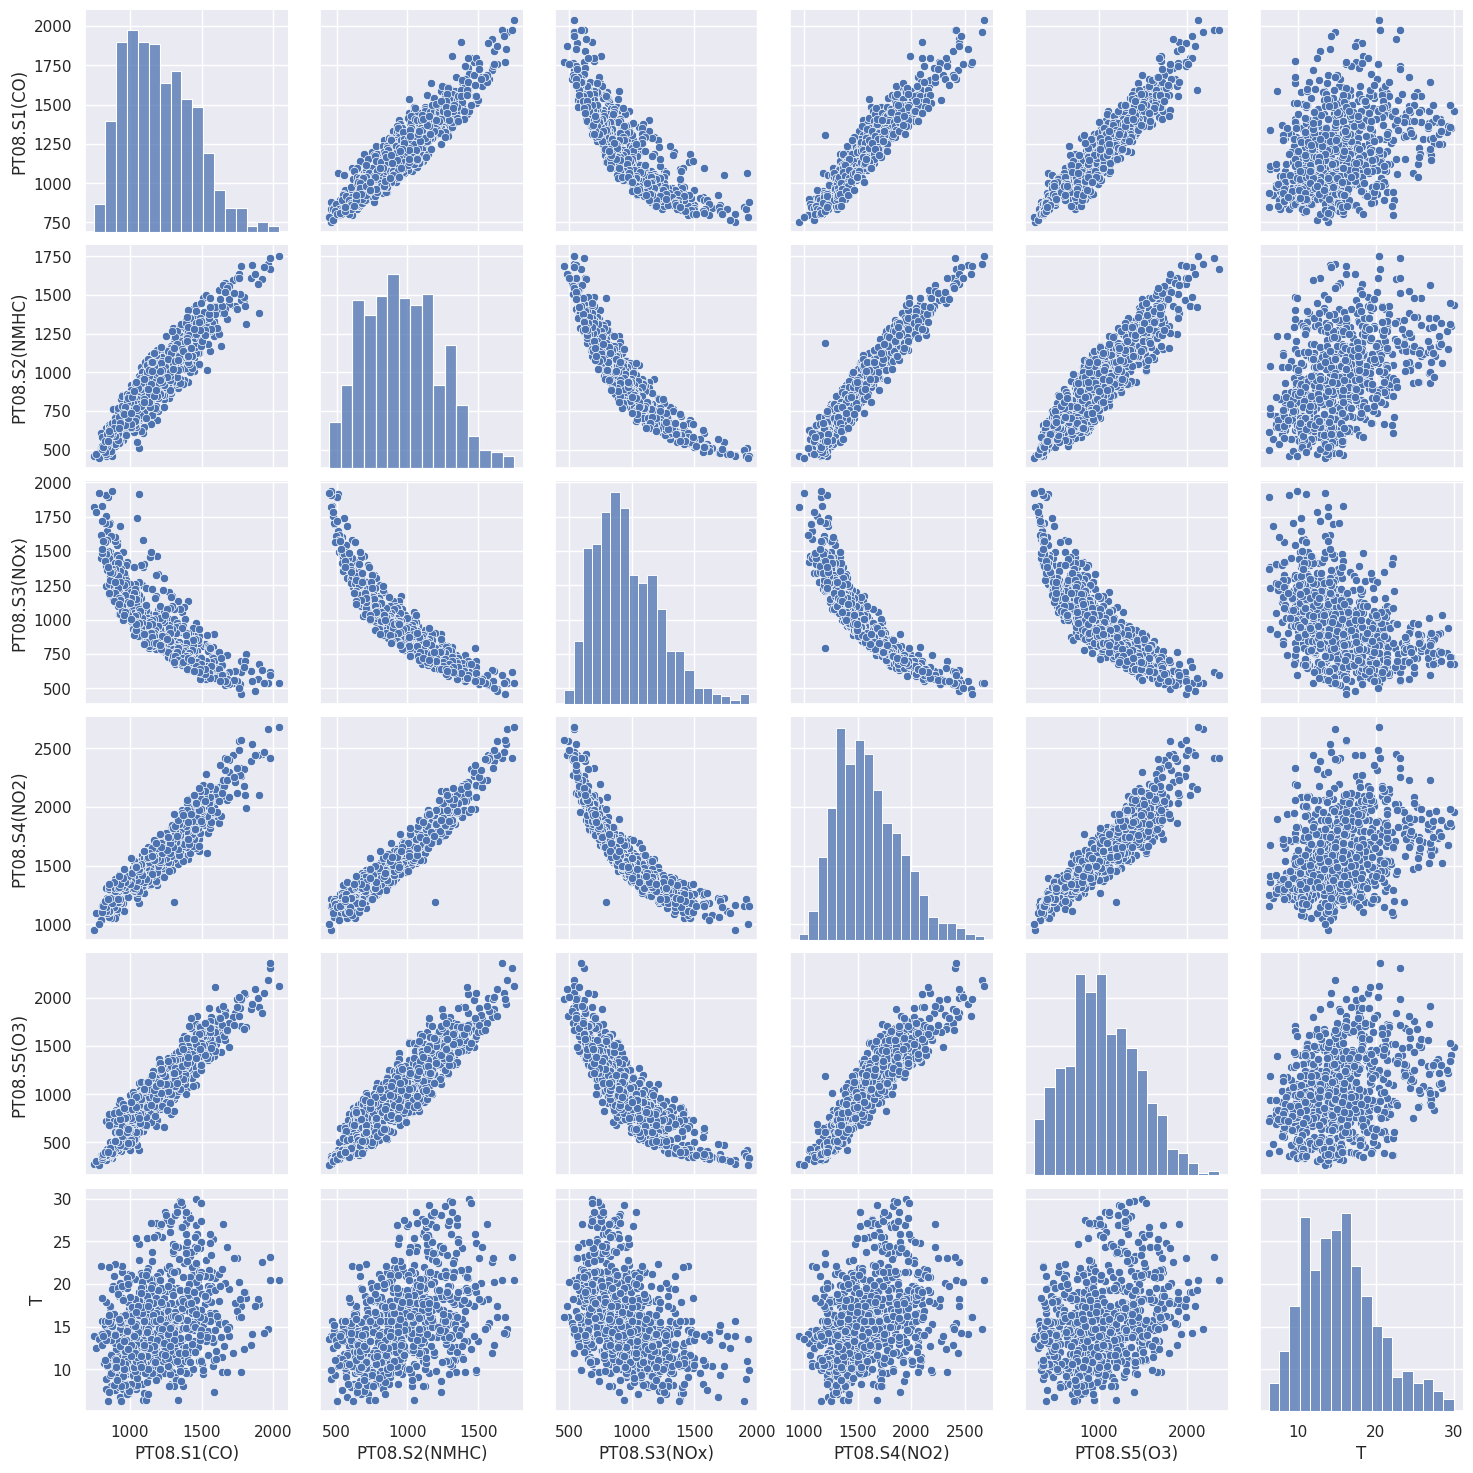

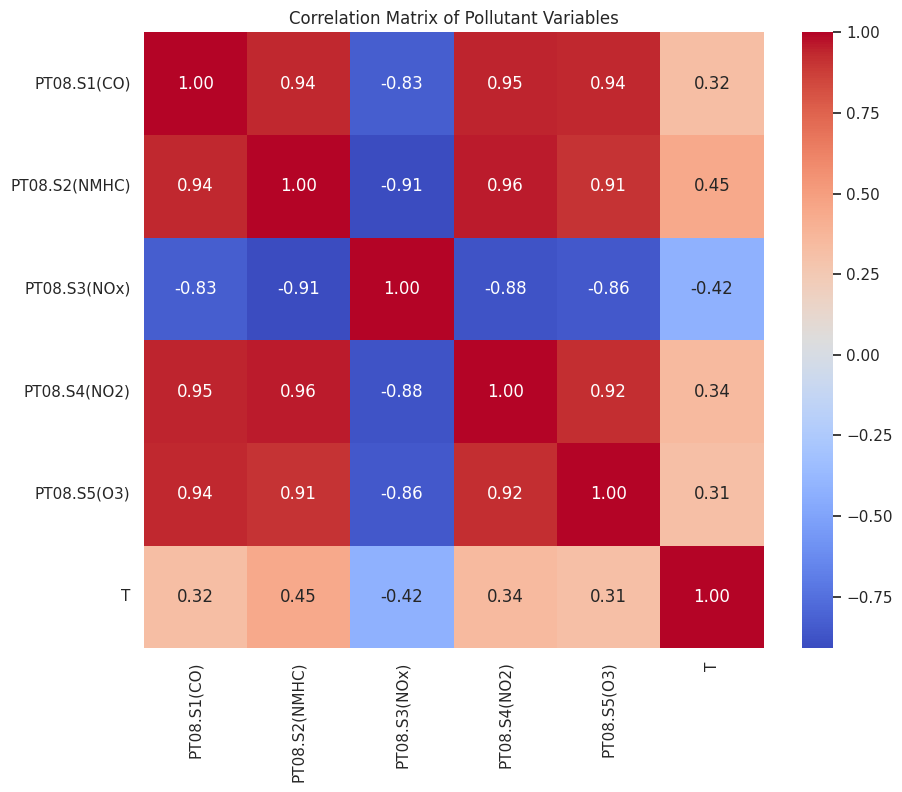

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select pollutant variables
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T']
pollutant_data = df[pollutants]

# Visualize pair-wise relationships with scatter plots
sns.pairplot(pollutant_data)
plt.show()

# Calculate correlation matrix
correlation_matrix = pollutant_data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Pollutant Variables")
plt.show()


In [ ]:
df.head(2)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   

      T         RH        AH  
0  13.6  48.875001  0.757754  
1  13.3  47.700000  0.725487

In [ ]:
# Convert 'Date' and 'Time' columns to datetime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Sort the DataFrame by 'DateTime'
df = df.sort_values(by='DateTime')

# Extract numerical features from 'DateTime' column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second

# Drop 'Date', 'Time', and 'DateTime' columns
df.drop(columns=['Date', 'Time', 'DateTime'], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Extract input features (X) and target variable (y)
X = df.drop(columns=['PT08.S1(CO)'])  # Exclude 'PT08.S1(CO)' from input features
y = df['PT08.S1(CO)']

# # Convert 'Date' and 'Time' columns to datetime
# X['DateTime'] = pd.to_datetime(X['Date'].astype(str) + ' ' + X['Time'].astype(str))

# # Extract numerical features from 'DateTime' column
# X['Hour'] = X['DateTime'].dt.hour
# X['Minute'] = X['DateTime'].dt.minute
# X['Second'] = X['DateTime'].dt.second

# # Drop 'Date', 'Time', and 'DateTime' columns
 X = X.drop(columns=['Date', 'Time', 'DateTime'])

# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input features for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Modified LSTM architecture and hyperparameters
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Adjusted learning rate and epochs
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Increased number of epochs
fit=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# Evaluate the model
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

Epoch 1/10
11/11 [==============================] - 7s 143ms/step - loss: 1521609.7500 - val_loss: 1498407.8750
Epoch 2/10
11/11 [==============================] - 1s 78ms/step - loss: 1521268.2500 - val_loss: 1497632.0000
Epoch 3/10
11/11 [==============================] - 1s 80ms/step - loss: 1516297.1250 - val_loss: 1447803.1250
Epoch 4/10
11/11 [==============================] - 2s 143ms/step - loss: 1064233.8750 - val_loss: 815200.1875
Epoch 5/10
11/11 [==============================] - 1s 79ms/step - loss: 709674.2500 - val_loss: 365783.3438
Epoch 6/10
11/11 [==============================] - 1s 82ms/step - loss: 299118.4062 - val_loss: 168186.2969
Epoch 7/10
11/11 [==============================] - 1s 88ms/step - loss: 191000.0312 - val_loss: 102376.5938
Epoch 8/10
11/11 [==============================] - 1s 135ms/step - loss: 108657.6562 - val_loss: 44306.7500
Epoch 9/10
11/11 [==============================] - 2s 146ms/step - loss: 93437.8750 - val_loss: 30475.8008
Epoch 10/10

The LSTM architecture is adjusted to include three LSTM layers with decreasing units (128, 64, 32) to capture hierarchical representations.

Dropout layers with a dropout rate of 0.2 are added after each LSTM layer to prevent overfitting.

The learning rate is reduced to 0.0005 to slow down the learning process and possibly achieve better convergence.

The number of epochs is increased to 150 to allow the model more time to learn from the data.

Adjustments can still be made based on experimentation and observing the model's performance on the validation set.

Output:
The output corresponds to the training and evaluation results of the LSTM model after training for 150 epochs. Let's break down each part of the output:

1. **Epoch 150/150**:
   
   This indicates that the model has completed the 150th epoch out of a total of 150 epochs. During each epoch, the model iterates over the entire training dataset once and updates its parameters based on the calculated loss.

2. **11/11 [==============================] - 0s 20ms/step - loss: 25939.5332**:
   
   - **11/11**: Represents the progress of the training process. It indicates that the model has completed training on 11 batches of data (or steps) out of a total of 11 batches.
   - **[==============================]**: The progress bar visualizes the completion of each epoch.
   - **0s 20ms/step**: Indicates the time taken to process each step (batch) during training. In this case, each step took approximately 20 milliseconds.
   - **loss: 25939.5332**: Indicates the average loss (mean squared error) computed over the training dataset for the current epoch. The loss value represents how well the model is performing on the training data at this stage of training. A higher loss value indicates poorer performance.

3. **val_loss: 2146.4243**:
   
   - **val_loss**: Represents the average loss (mean squared error) computed over the validation dataset for the current epoch. The validation loss is a measure of how well the model generalizes to unseen data. A lower validation loss indicates better generalization performance.
   - **2146.4243**: The actual value of the validation loss for the current epoch.

4. **6/6 [==============================] - 0s 4ms/step**:
   
   This indicates that the evaluation of the model on the test dataset is complete. The model evaluated the test dataset in 6 steps (batches), and each step took approximately 4 milliseconds.

5. **R2 Score: 0.970595364832647**:
   
   The R2 score (coefficient of determination) measures the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, where a score closer to 1 indicates a better fit of the model to the data. In this case, the R2 score is approximately 0.9706, indicating that the model explains around 97.06% of the variance in the test dataset.

6. **Mean Squared Error: 2146.424282510841**:
   
   The mean squared error (MSE) measures the average squared difference between the actual and predicted values of the target variable. A lower MSE indicates better performance, as it reflects smaller prediction errors. In this case, the MSE on the test dataset is approximately 2146.42.

Overall, the output suggests that the LSTM model has achieved good performance, with a high R2 score and relatively low mean squared error on the test dataset, indicating that the model effectively captures the underlying patterns in the data and makes accurate predictions.

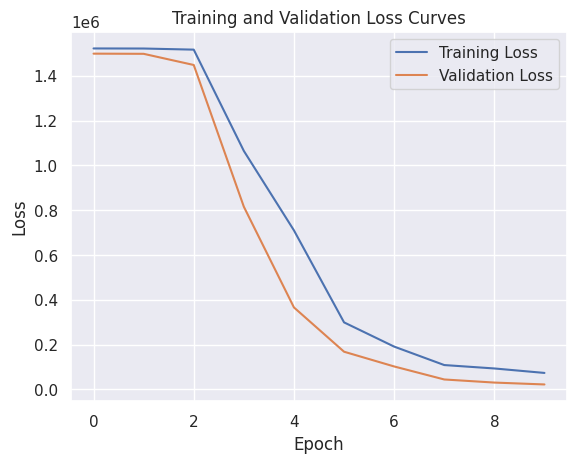

In [ ]:
# Plot the training and validation loss curves
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Extract input features (X) and target variable (y)
X = df.drop(columns=['PT08.S1(CO)'])  # Exclude 'PT08.S1(CO)' from input features
y = df['PT08.S1(CO)']

# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2860.359783183948, 0.9555845988393434)

In [ ]:
import statsmodels.api as sm

# Add a constant term to the input features (for intercept)
X_train_const = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_const)
results = model_sm.fit()

# Print the coefficients and their p-values
print("Coefficients:")
print(results.params)
print("\nP-values:")
print(results.pvalues)


Coefficients:
const    6.876220e+02
x1       5.086048e+02
x2      -1.348155e+02
x3      -2.855537e+02
x4       5.949047e+02
x5       1.135966e+02
x6       2.150534e+02
x7       4.655256e+01
x8       2.128950e+02
x9       2.837658e+02
x10     -8.951481e+01
x11     -1.520632e+02
x12      3.298845e+02
x13     -4.940757e-15
x14     -1.330250e+02
x15     -7.359078e+01
x16     -5.396770e+00
x17      0.000000e+00
x18      0.000000e+00
dtype: float64

P-values:
const    3.577048e-39
x1       1.363766e-15
x2       2.070849e-06
x3       2.398211e-02
x4       3.181956e-06
x5       6.858438e-03
x6       9.823026e-06
x7       1.272293e-01
x8       1.389419e-02
x9       3.198204e-19
x10      3.890777e-02
x11      4.186736e-04
x12      2.092288e-11
x13      7.861008e-01
x14      1.694883e-22
x15      2.229954e-20
x16      4.894475e-01
x17               NaN
x18               NaN
dtype: float64
